In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from subprocess import check_output

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1) We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
 <p>Task:
    <p>1.fitting it to the periodic function
    <p>2.plot the fit
    <P>Data
    <p>Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    <p>Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

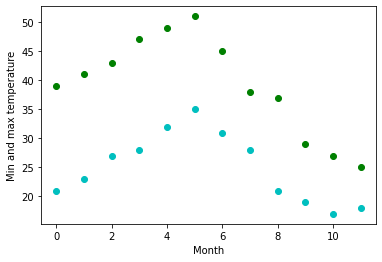

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [3]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

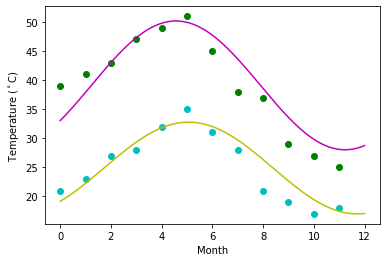

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Matplotlib:
<p>This assignment is for visualization using matplotlib:
data to use:
<p>url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
<p>titanic = pd.read_csv(url)
Charts to plot:
<p>1. Create a pie chart presenting the male/female proportion
<p>2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
titanic_df=pd.read_csv('titanic_original.csv')
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [7]:
titanic_df.apply(lambda x: sum(x.isnull()),axis=0)

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [9]:
titanic_df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [10]:
titanic_df['sex'].fillna('male', inplace=True)

In [11]:
titanic_df.apply(lambda x: sum(x.isnull()),axis=0)

pclass          1
survived        1
name            1
sex             0
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

([<matplotlib.patches.Wedge at 0x1570477c648>,
 [Text(-0.4816813715424992, 0.9889302585667692, 'female'),
  Text(0.4816814641328296, -0.9889302134685005, 'male')],
 [Text(-0.2627352935686359, 0.5394165046727831, '64.4%'),
  Text(0.26273534407245247, -0.5394164800737274, '35.6%')])

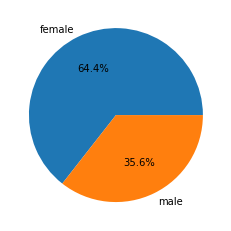

In [12]:
plt.pie(titanic_df.sex.value_counts(), labels=titanic_df.sex.unique(), autopct='%1.1f%%')

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

imputer.fit(titanic_df.loc[:,['age','fare']])


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [15]:
titanic_df.loc[:,['age','fare']] = imputer.fit_transform(titanic_df[['age','fare']])

In [16]:
titanic_df.apply(lambda x: sum(x.isnull()),axis=0)

pclass          1
survived        1
name            1
sex             0
age             0
sibsp           1
parch           1
ticket          1
fare            0
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [17]:
df = pd.DataFrame(titanic_df)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.337500,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.550000,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.550000,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.550000,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.550000,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.454200,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.225000,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.225000,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.875000,NaN,S,NaN,NaN,NaN


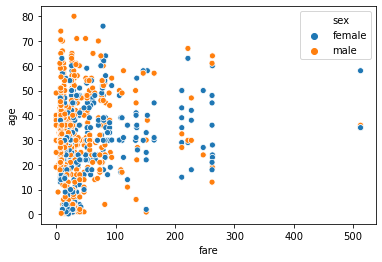

In [18]:
sns.scatterplot(x='fare',y='age',hue='sex',data=df)